# DS Foundations Project Status Assessment 

### Exploring Tennessee In School Suspension Data

By: Lawand Yaseen 

In [10]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
from plotnine import *
import warnings
warnings.filterwarnings("ignore")

from sklearn import preprocessing as pp
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression as LM
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.tree import DecisionTreeRegressor as DTree
from sklearn import tree
from sklearn.ensemble import BaggingRegressor as Bag
from sklearn.ensemble import RandomForestRegressor as RF

import sklearn.metrics as m

from sklearn.pipeline import Pipeline

#DATAFRAME AND VIZ CODE FOR PRESENTATION 
data = pd.read_csv("/Users/lawandyaseen/Desktop/PPOL564FinalProject/Suspension_TeachExp_Finance.csv")
data = data.drop(columns = ["Unnamed: 0"])

#viz1 draft
viz1 = data

#creating ggplot viz
test = ggplot(viz1, aes(x = "ALL STUDENTS", y ="ECONOMICALLY DISADVANTAGED")) + geom_point() + theme_classic() + facet_wrap(["SCHOOL_LEVEL_PER_PUPIL_QUARTILE"])

#adding labels
test = test + labs(x = "Percent of Students Suspended", y = "Percent of Economically Disadvantaged Students Suspended", title = "Per Student Funding Effect on ISS")

#viz3 draft 
viz3 = data.sort_values(by = "ECONOMICALLY DISADVANTAGED", ascending = False)
viz3 = viz3[:50]

#creating plot object
plot = (ggplot(viz3, aes(x = "SCHOOL_NAME", y = "SCHOOL_LEVEL_PER_PUPIL_QUARTILE")) + geom_tile() + guides(fill = False) + theme(axis_text_x = element_text(angle = 90, hjust = 1)))


In [13]:
#setting seed 
np.random.seed(1234)


#separating outcome and predictors
#outcome -- all students
Y = data['ALL STUDENTS']
#predictors of interest
X = data[['BLACK', 'ECONOMICALLY DISADVANTAGED', 'MALE', 'BHNA', 'TEACH_EXP', 'TEACH_EMERG', 'TEACH_OUT_OF_FIELD', 'SCHOOL_LEVEL_PER_PUPIL']]
#economically disadvantaged, black, white, per pupil spending, teacher experience, teacher emergency, teacher out of field


#split data into training and test
train_X, test_X, train_Y, test_Y = train_test_split(X,Y,test_size=.2,random_state=1234)

#scale of spending --- thousands, other categories are between 0-100


#Using SKLEARN from class

fold_generator = KFold(n_splits=5, shuffle=True,random_state=111)
use_metrics = ["neg_mean_squared_error"]

# (2) Next specify the preprocessing steps
preprocess = ColumnTransformer(transformers=[('num', pp.MinMaxScaler(), ['BLACK', 'ECONOMICALLY DISADVANTAGED', 'MALE', 'BHNA', 'TEACH_EXP', 'TEACH_EMERG', 'TEACH_OUT_OF_FIELD', 'SCHOOL_LEVEL_PER_PUPIL'])])


# (3) Next Let's create our model pipe (note for the model we leave none as a placeholder)
pipe = Pipeline(steps=[('pre_process', preprocess),
                       ('model',None)])


# (4) Specify the models and their repsective tuning parameters.
# Note the naming convention here to reference the model key
search_space = [
    # Linear Model
    {'model' : [LM()]},

    # KNN with K tuning param
    {'model' : [KNN()],
     'model__n_neighbors':[10,15,20,25,30]},

    # Decision Tree with the Max Depth Param
    {'model': [DTree()],
     'model__max_depth':[1,2,3,5]},

    # The Bagging decision tree model
    {'model': [Bag()]},

    # Random forest with the N Estimators tuning param
    {'model' : [RF()],
     'model__max_depth':[1,2,3],
     'model__n_estimators':[500,1000,1250]},
]

# (5) Put it all together in the grid search
search = GridSearchCV(pipe, search_space,
                      cv = fold_generator,
                      scoring='neg_mean_squared_error',
                      n_jobs=4)
# (6) Fit the model to the training data
search.fit(train_X,train_Y)


search.best_score_ # Mean out-of-sample (CV) error


search.best_params_
#need to tune the parameter


#predict will use best model
pred_Y = search.predict(test_X)

letsgo = (
    ggplot(pd.DataFrame(dict(pred=pred_Y,truth=test_Y)),
          aes(x='pred',y="truth")) +
    geom_point(alpha=.75) +
    geom_abline(linetype="dashed",color="darkred",size=1) +
    theme_bw() +
    theme(figure_size=(10,7))
)


## Recent Legislative Activity

### School to Prison Pipeline 
   - Black students and students with disabilities are more likely to recieve harsher discipline
   - Student who have been suspended are twice as likely to be involved in the criminal justice system
   - In TN: 91,000 students were suspended at least once during the 2017-2018 AY  
    
### Tennessee Discipline Act 
   - Legislation enacted on April 6, 2021: Allows teachers to initiate in school suspension (ISS) process 
       - "*Creates a uniform referral process allowing teachers to petition a removal of a student who repeatedly or substantially interferes with classroom learning*."
   - **Perception**: improving student behavior and classroom experience universally 


## Proposed Analysis
  - Exploring any potential relationships between ISS rate and student demographics, teacher experience and per student spending 

**Question of Interest**: Are there tangible predictors within the aformentioned categories that predict a student's likelihood to be in ISS? For schools with notable volume in these variables, can we externally identify any more context that would cause such increase?

## Data Analysis  

# Slide 1 Method Explored and Concerned

# Slide 2 Method Explored and Concerned

# Slide 1 Methods Used & Rationale 

data clean up 

In [10]:
data.head()

,Unnamed: 0,SCHOOL_NAME,ALL STUDENTS,ASIAN,BLACK,BHNA,ECONOMICALLY DISADVANTAGED,ELA,FEMALE,HISPANIC,...,TEACH_EMERG,TEACH_NOT_EMERG,TEACH_OUT_OF_FIELD,TEACH_IN_FIELD,SCHOOL_LEVEL_PER_PUPIL,SCHOOL_LEVEL_PER_PUPIL_QUARTILE,0-25 %,25-50 %,50-75 %,75-100 %
0,0,Anderson County High School,5.0,0.0,6.7,3.3,10.9,0.0,3.4,0.0,...,0.0,100.0,0.0,100.0,5546.155493,0-25 %,1,0,0,0
1,1,Andersonville Elementary,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,100.0,0.0,100.0,6696.478548,25-50 %,0,1,0,0
2,2,Briceville Elementary,3.8,0.0,0.0,0.0,5.1,0.0,0.0,0.0,...,0.0,100.0,0.0,100.0,9289.358974,75-100 %,0,0,0,1
3,3,Claxton Elementary,1.1,0.0,0.0,1.8,1.7,0.0,0.0,0.0,...,0.0,100.0,0.0,100.0,7419.320455,50-75 %,0,0,1,0
4,4,Clinton Middle School,13.6,0.0,23.3,14.5,21.5,0.0,6.6,0.0,...,0.0,100.0,0.0,100.0,5940.561747,0-25 %,1,0,0,0


# Slide 2 Methods Used & Rationale 



## Results Slide 1 

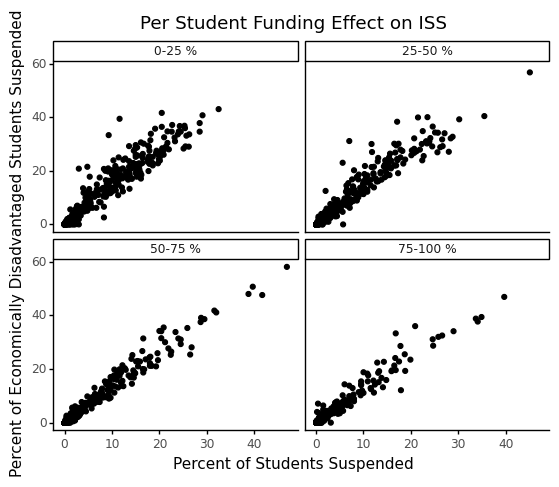

<ggplot: (8787884469300)>

In [3]:
test

## Results Slide 2 

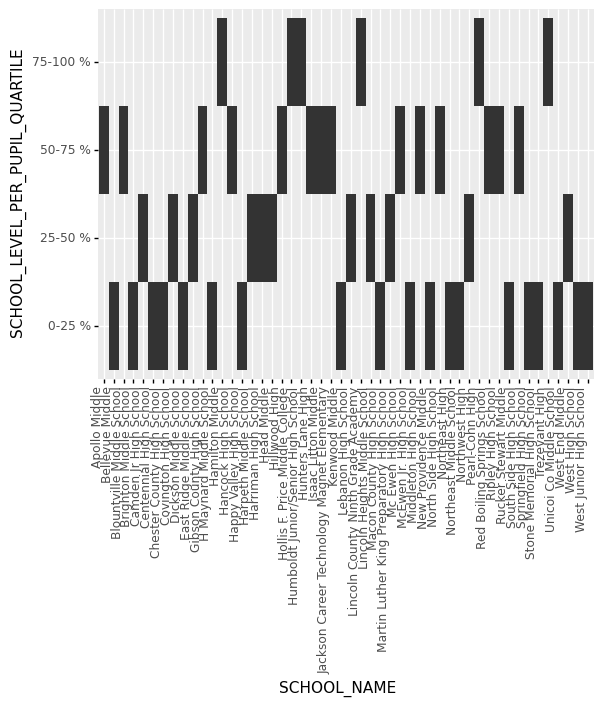

<ggplot: (8787882607454)>

In [6]:
plot

## Results Slide 3 

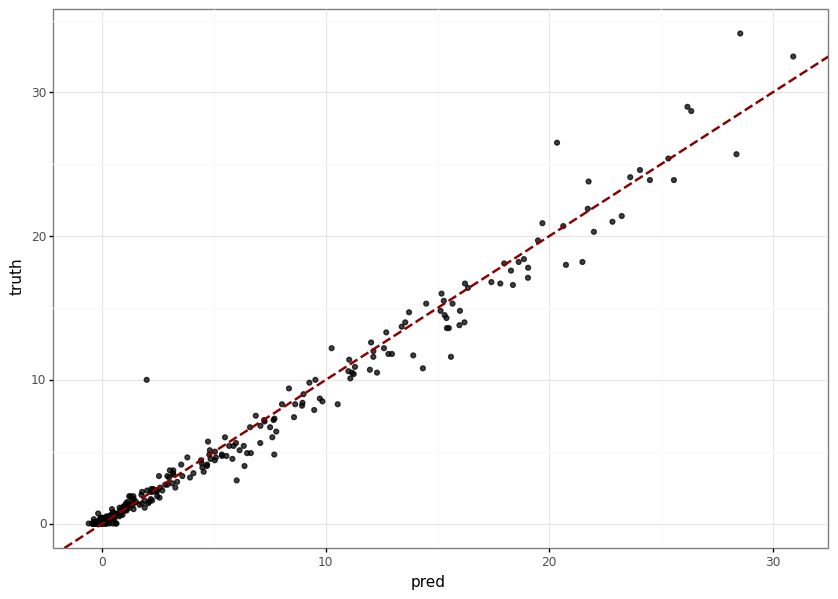

<ggplot: (8787890761701)>

In [14]:
letsgo

## Lessons Learned and Future Plans + Problems